#  SET 2

### Bahador Amjadi
### Matricula:  

### important: *please use the data source which is included in the zip file*

In [1]:
library(ggplot2)
library(pracma)

ERROR: Error in library(pracma): there is no package called 'pracma'


## Exercise 1

In [2]:
E.value <- function(x,p) {return(sum(x*p)) }
VAR     <- function(x,p) {return(E.value((x-E.value(x, p))**2, p))}  #var(X)=E[(X−μ)2],where μ=E(X)

x  <- c(15.58, 15.9, 16,16.1, 16.2  )
p1 <- c(0.15, 15.9,  16,  16.1, 16.2)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [3]:
cat("Excepted Value of x for p1:", E.value(x,p1), "\nVariance of x for p1:",VAR(x,E.value(x,p1)))
cat('\n\n')
cat("Excepted Value of x for p2:", E.value(x,p2), "\nVariance of x for p2:",VAR(x,E.value(x,p2)))

Excepted Value of x for p1: 1032.797 
Variance of x for p1: 3.50457e+13

Excepted Value of x for p2: 15.9622 
Variance of x for p2: 126207306

## Exercise 2

In [4]:
options(repr.plot.width=3, repr.plot.height =2)  #changing size of plots

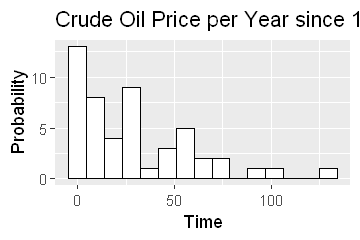

In [5]:
set.seed(1234)

#part A
rate = 1/30
N    = 50
df <- data.frame(person = seq(1,N) , time = rexp(N, rate))

ggplot(df, aes(x=time)) + 
    geom_histogram(color="black", fill="white", bins=15) +
    labs(title = "Crude Oil Price per Year since 1861",
    x = "Time",
    y = "Probability")

In [23]:
prob.more.than <- function(x,threshold){return (length(x[x > threshold])/length(x))}
prob.less.than <- function(x,threshold){return (length(x[x < threshold])/length(x))}

In [24]:
#Part B

prob <- porb.less.than(df$time, 10)
cat ("The probability of waiting less than 10 minutes:", prob)

The probability of waiting less than 10 minutes: NaN

In [11]:
#Part C
avg.value <- mean(df$time)
cat("The average waiting time in minutes is:", avg.value)
#calculating the expected value?????

The average waiting time in minutes is: 29.67523

In [25]:
#part D
prob <- prob.more.than(df$time, 60)  #using a pre-defined fucntion
cat ("The probability of waiting more than 1 hour is:", prob)

The probability of waiting more than 1 hour is: NaN

## Exercise 3

The probability that there is at least 1 error in a specific page: 0.04462492

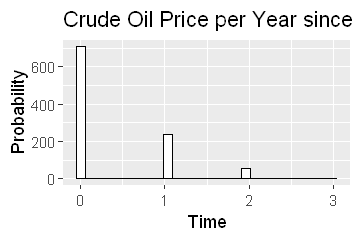

In [16]:
lambda = 1/3
N      = 1000
df <- data.frame(page = seq(1,N) , page.error = rpois(N, lambda))

ggplot(df, aes(x=page.error)) + 
    geom_histogram(color="black", fill="white", bins = 30) +
    labs(title = "Crude Oil Price per Year since 1861",
    x = "Time",
    y = "Probability")

prob <- ppois(1, lambda=1/3, lower=FALSE)
cat("The probability that there is at least 1 error in a specific page:", prob)


# # Histogram with density plot
# ggplot(df, aes(x=weight)) + 
#  geom_histogram(aes(y=..density..), colour="black", fill="white")+
#  geom_density(alpha=.2, fill="#FF6666") 

## Exercise 4

In [17]:
#There are 4 aces among 52 cards
#We should run the exeriment for N times and plot the distribution of the number at which an ace was drawn

N= 100000
deck      <- rep(0, 48)       # 0 : non-ace cards
deck      <- append(deck, rep(1,4))        # 1 : ace     cards
ace.found.at <- vector()

for (i in seq(1,N)){
ace.found <- FALSE
counter <- 1
while (ace.found == FALSE){
sample <- sample(deck,1,replace=TRUE)
if (sample != 1){
counter = counter + 1
} else {
ace.found = TRUE
ace.found.at <- append(ace.found.at, counter)
}}}

df <- data.frame(ace.found.at = ace.found.at)

The probability we would need at least 10 tries to draw the ace 0.44761

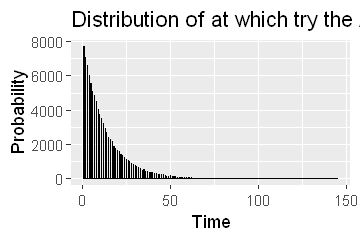

In [27]:
ggplot(df, aes(x=ace.found.at)) + 
    geom_histogram(color="black", fill="white", bins=2000) +
    labs(title = "Distribution of at which try the Ace was found",
    x = "Time",
    y = "Probability")

prob <- prob.more.than(ace.found.at, 10)
# prob <- length(ace.found.at[ace.found.at > 10])/length(ace.found.at)
cat("The probability we would need at least 10 tries to draw the ace", prob)

## Exercise 5

In [41]:
#part A
dens.func <- function(t){(t-1)*(2-t)}
c <- 1/integrate(dens.func, 1, 2)$value

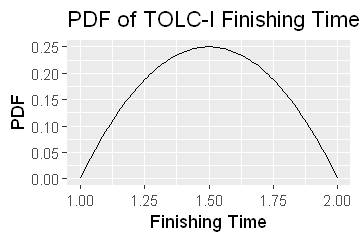

In [40]:
# df <- data.frame(time = time)

#providing a dummy dataset
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
       stat_function(fun = dens.func) + xlim(1,2) +
       labs(title = "PDF of TOLC-I Finishing Time",
       x = "Finishing Time",
       y = "PDF")

In [ ]:
#part B
ggplot(df, aes(x=time)) + 
    geom_histogram(aes(y=..density..), color="black", fill="white", bins=15) +
    geom_density(alpha=.2, fill="#FF6666") +
    labs(title = "Crude Oil Price per Year since 1861",
    x = "Time",
    y = "Probability")

In [48]:
#part C
#since we are provided with the analytic function we use integration for this part
norm.dens.func <- function(t){c*(t-1)*(2-t)}

#prob of finishing in more than 75 minutes:
prob <- integrate(norm.dens.func, 1.25, 2)$value
cat("The probability that the student will finish the test in more than 75 minutes is", prob)
cat("\n")
#prob of finishing between 90 and 120 minutes 
prob <- integrate(norm.dens.func, 1.5, 2)$value
cat("The probability that the student will finish the test between 90 and 120 minutes is", prob)

The probability that the student will finish the test in more than 75 minutes is 0.84375
The probability that the student will finish the test between 90 and 120 minutes is 0.5

## Exercise 6

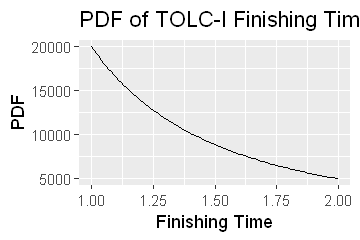

In [101]:
#part A
dens.func <- function(x){return(10000*(2/(x**2)))}

ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
       stat_function(fun = dens.func) + xlim(1,2) +
       labs(title = "PDF of TOLC-I Finishing Time",
       x = "Finishing Time",
       y = "PDF")

In [105]:
#let's normalize the pdf
c <- (1/integrate(dens.func, 1, 2)$value)
norm.dens.func <- function(x){return(c*10000*(2/(x**2)))}

In [107]:
#part B
#prob that tire last less than 15000 km:
prob <- integrate(norm.dens.func, 1, 1.5)$value
cat("The probability that the tire will last less than 15000km is", prob)

The probability that the tire will last less than 15000km is 0.6666667

In [108]:
#part C
N= 3000
samples <- runif(N) + 1    #generating uniform random numbers between 1 and 2
probs <- dens.func(samples)
probs <- probs/sum(probs)  #normalizing the probabilites

cat("The mean value of x is", E.value(samples, probs))
cat("\n")
cat("The variance of x is",  VAR(samples, probs))

The mean value of x is 1.388345
The variance of x is 0.07754132